# Homework 1 - KNN
## CSCI 5622 - Spring 2019

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But 1) I'll know that you know what's really going on, and 2) you'll know you can do it, because 2a) someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...), or maybe because you're working on something important and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But, for now, let's set up a KNNClassifier class.

In [2]:
import sklearn.neighbors

class KNNClassifier:
    
    def __init__(self, X, y, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS
        X - our training data features
        y - our training data answers
        k - the number of nearest neighbors to consider for classification
        """
        self._model = sklearn.neighbors.BallTree(X)
        self._y = y
        self._k = k
        self._counts = self.getCounts()
        
    def getCounts(self):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        counts = dict({1:0,-1:0})
        from itertools import groupby
        e = np.array(self._y)
        e.sort()
        for key, group in groupby(e): # searching for key value pair in sorted group
            counts[key] = len(list(group)) 
        #print(counts)
    
        return(counts)
    
    def majority(self, indices):
        """
        Given indices, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indices - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        assert len(indices) == self._k  #Did not get k neighbor indices

        labllist = {}
        for index in indices:
            index = self._y[index]
            if index in labllist.keys():  # storing data in the list for finding majority class
                labllist[index] = labllist[index] + 1
            else:
                labllist[index] = 1

        max = 0;

        for key in labllist.keys():
            if labllist[key] > max: # comparing the elements of the list to find the most aprread class
                max = labllist[key]

        labCount = []

        for key in labllist.keys():
            if labllist[key] == max:
                labCount.append(key)
        label = labCount[0]
        if len(labCount) > 1:
            for i in labCount:
                if self._counts[label] < self._counts[i]:
                    label = i
       # print (label)
        
        return(label)
    
    def classify(self, point):
        """
        Given a new data point, classify it according to the training data X and our number of neighbors k into the appropriate class in our training answers y
        PARAMETERS
        point - a feature vector of our test point
        RETURNS
        ans - our predicted classification
        """
        answ = 0
        
        answ = self._model.query(point.reshape(1, -1), self._k, return_distance= False)
        answ = answ.flatten() #query is returning 2D array
        return self.majority(answ)
       
      
    
    def confusionMatrix(self, testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        
        C = np.zeros((10,10), dtype=int) #Creating a confusion matrix with initial values as zero
        for xx, yy in zip(testX, testY):
            column = self.classify(xx)
            C[yy][column] += 1
        
                
        
        #print(C)
        return(C)
    
    def accuracy(self, C):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = np.sum(C.diagonal()) / C.sum()
        #print(score)
        return(score)

*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 40 Points (10 each)

1.1 - Complete the getCounts function to return the count of each class found in the training set

1.2 - Complete the majority function to determine the majority class of a series of neighbors

1.3 - Complete the classify function to capture the predicted class of a new datapoint

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the confusionMatrix function to reveal the results of classification

You can take a look at the unit tests below to see how we create data to input into our classifier, what kinds of things we expect as output, etc. You should also consider expanding the test cases to make sure your classifier is working correctly.


In [10]:
import unittest

class KNNTester(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[3,1],[2,8], [2,7], [5,2],[3,2],[8,2],[2,4]])
        self.y = np.array([1, -1, -1, 1, -1, 1, -1])
        self.knnfive = KNNClassifier(self.x, self.y)
        self.knnthree = KNNClassifier(self.x, self.y, 3)
        self.knnone = KNNClassifier(self.x, self.y, 1)
        
        self.testPoints = np.array([[2,1], [2,6], [4, 4]])
        z=self.knnfive. confusionMatrix(self.x, self.y)
        self.knnthree. confusionMatrix(self.x, self.y)
        self.p=self.knnone. confusionMatrix(self.x, self.y)
        self.knnone.accuracy(self.p) 
        print(self.p)
        self.no=self.knnone.getCounts()
        print(self.no)
    def testCounter(self):
        """
        Test getCounts function from knnclassifier
        """
        self.assertEqual(self.knnfive._counts[1], 3)
        self.assertEqual(self.knnfive._counts[-1], 4)
        
    def testKNNOne(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 1
        """
        self.assertEqual(self.knnone.classify(self.testPoints[0]), 1)
        
        #BEGIN Workspace
        #Add more tests as needed
        #END Workspace
    def test2(self):
        """
        Unit test for 3NN
        """
        self.assertEqual(self.knnthree.classify(self.testPoints[0]), -1)
    def test3(self):
        """
        Unit test for 5NN
        """
        self.assertEqual(self.knnfive.classify(self.testPoints[0]), -1)
    
        
        
    
    #BEGIN Workspace
    #Add more test functions as requested
    #HINT - You'll want to make sure your
    #END Workspace
    
tests = KNNTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)


....

[[0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4]]
{1: 3, -1: 4}
[[0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4]]
{1: 3, -1: 4}
[[0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4]]
{1: 3, -1: 4}
[[0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4]]
{1: 3, -1: 4}



----------------------------------------------------------------------
Ran 4 tests in 0.039s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, or at a bank, and you're handed a hand-written envelope, or check, or other piece of information and you have to identify exactly what it says. Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 30 Points

2.1 Randomly divide our Digits dataset into training and testing sets (15 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [11]:
from sklearn.model_selection import train_test_split
class Numbers:
    def __init__(self):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 2.1
        self.train_x = np.array(digits.data) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(digits.target) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(digits.data) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(digits.target) # A 1D np.array of testing answers, REPLACE
        self.train_x,self.test_x,self.train_y,self.test_y = train_test_split(np.array(digits.data),np.array(digits.target), test_size=0.20)

        #TODO: Divide our dataset into Train and Test datasets (80/20 split), replacing the variables above
        #END Workspace 2.1
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        #END Workspace 2.2
        print('\ntrain size for data\n',self.train_x.size)
        print('\ntest size for data\n',self.test_x.size)
        print('\ntrain size for label\n',self.train_y.size)
        print('\ntest size for label\n',self.test_y.size)
        print('\ntrain pizes for data\n',self.train_x[0].shape)
        print('\ntrain shape for data\n',self.train_x.shape)
        print('\ntest shape for data\n',self.test_x.shape)
        print('\ntraim shape for label\n',self.train_y.shape)
        print('\ntest shape for label\n',self.test_y.shape)
        

    def classify(self):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        self.aa= KNNClassifier(self.train_x,self.train_y) #Instantiating the KNNCLassifier Class
        self.b=self.aa.confusionMatrix(self.test_x,self.test_y) #Calling the Confusion matrix function
        print(self.aa.accuracy(self.b)) #Calling the accuracy function and printing it.
        print(self.b)  #printing the confusion matrix
        
    def viewDigit(self, digitImage, label):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        if label is not None: 
            print('true label: {:d}'.format(label))
            plt.imshow(digitImage.reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest') #plotting the digit and its true label
        #plt.show()
        
        


train size for data
 91968

test size for data
 23040

train size for label
 1437

test size for label
 360

train pizes for data
 (64,)

train shape for data
 (1437, 64)

test shape for data
 (360, 64)

traim shape for label
 (1437,)

test shape for label
 (360,)
0.9861111111111112
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  1  1  0  0  0 38]]
true label: 6


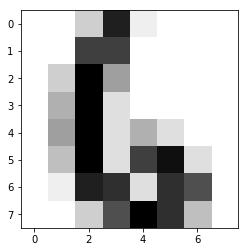

In [12]:
x=Numbers()
x.report()
x.classify()
x.viewDigit(x.train_x[0],x.train_y[0])


*Wow, I can't believe we just created a KNN Classifier - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the viewDigit function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified.

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy.

3.3 (Bonus) Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact.

true label: 5
true label: 7
true label: 9
true label: 9
true label: 5

Misclassified instance 9

Misclassified instance 9

Misclassified instance 4

Misclassified instance 5

Misclassified instance 6


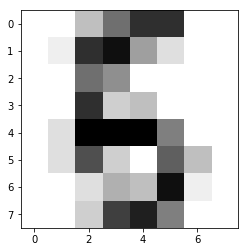

In [81]:
classifier= KNNClassifier(x.train_x,x.train_y)
tup1=[]
def confused(testX, testY):
    for xx, yy in zip(testX, testY):
            column = classifier.classify(xx);   
            if yy!=column:
                tup1.append((xx,yy,column))  # Storing the details of the misclassified class
 
                x.viewDigit(xx,yy)  #calling viewDigit function to print the image of misclassified digit
    

confused(x.test_x,x.test_y)

print("\nMisclassified instance",tup1[0][2])
print("\nMisclassified instance",tup1[1][2])
print("\nMisclassified instance",tup1[2][2])
print("\nMisclassified instance",tup1[3][2])
print("\nMisclassified instance",tup1[4][2])

            

**Answer 3B**
> From analyzing thw confusion matrix we got to know that there are few misclassifications and are confused in assigning their label.<br/>
>Example the digit 5 gets confuesed with 9, 9 gets confused with 4 and 7 gets confused with 9<br/>
>There is a misclassification because these digits look very similiar when we write them with our hand.<br/>

In [82]:
def plot(dict, Xlabel, Ylabel):
    listss = sorted(dict.items())
    x, y = zip(*listss)  # unpack a list of pairs into two tuples
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    plt.plot(x, y)
    plt.show()
    print(dict)

In [83]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
class Numbers2:
    
    def __init__(self, trainPercentage):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 3.3a
        self.train_x = np.array(digits.data) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(digits.target) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(digits.data) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(digits.target) # A 1D np.array of testing answers, REPLACE
        self.train_x,self.test_x,self.train_y,self.test_y = train_test_split(np.array(digits.data),np.array(digits.target), test_size=trainPercentage*0.2, random_state=42)
        print('\ntrain size for data\n',self.train_x.size)
        print('\ntest size for data\n',self.test_x.size)
        print('\ntrain size for label\n',self.train_y.size)
        print('\ntest size for label\n',self.test_y.size)
        print('\ntrain pizes for data\n',self.train_x[0].shape)
        print('\ntrain shape for data\n',self.train_x.shape)
        print('\ntest shape for data\n',self.test_x.shape)
        print('\ntraim shape for label\n',self.train_y.shape)
        print('\ntest shape for label\n',self.test_y.shape)
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        #HINT: You should be able to mostly copy your own work from the original Numbers class
        #END Workspace 3.3a

    def classify(self, k):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        self.aa= KNNClassifier(self.train_x,self.train_y)
        self.b=self.aa.confusionMatrix(self.test_x,self.test_y)
        self.k=(self.aa.accuracy(self.b))
        #print(self.k)
        #print(self.b)
        #BEGIN Workspace 3.2a
        #TODO: Create classifier from training data (using k nearest neighbors), generate confusion matrix for test data
        #HINT: You can copy your own work from the original Numbers class
        #END Workspace 3.2a
        
    def viewDigit(digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()

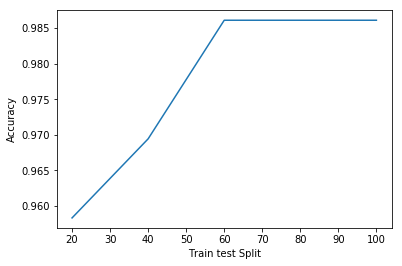

{100: 0.9861111111111112, 80: 0.9861111111111112, 60: 0.9861111111111112, 40: 0.9694444444444444, 20: 0.9583333333333334}


In [84]:
def Split_vs_accuracy(X, y):
    dict = {}
    for wo in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=wo * 0.2) #using the loop to test all the splits
        knnone = KNNClassifier(X_train, y_train)
        #print("Data for  " + str(wo + 1))
        confusionmatrix = knnone.confusionMatrix(x.test_x, x.test_y)
        dict[100 - wo * 20] = knnone.accuracy(np.asarray(confusionmatrix))
    Xlabel = "Train test Split"
    Ylabel = "Accuracy"
    plot(dict, Xlabel, Ylabel) # plotting the accuracy and test train split

Split_vs_accuracy(x.train_x, x.train_y)


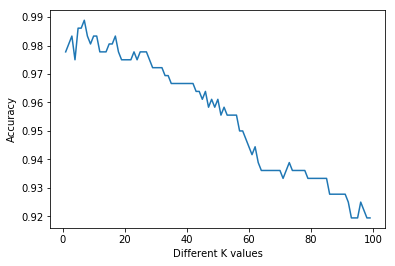

{1: 0.9777777777777777, 2: 0.9805555555555555, 3: 0.9833333333333333, 4: 0.975, 5: 0.9861111111111112, 6: 0.9861111111111112, 7: 0.9888888888888889, 8: 0.9833333333333333, 9: 0.9805555555555555, 10: 0.9833333333333333, 11: 0.9833333333333333, 12: 0.9777777777777777, 13: 0.9777777777777777, 14: 0.9777777777777777, 15: 0.9805555555555555, 16: 0.9805555555555555, 17: 0.9833333333333333, 18: 0.9777777777777777, 19: 0.975, 20: 0.975, 21: 0.975, 22: 0.975, 23: 0.9777777777777777, 24: 0.975, 25: 0.9777777777777777, 26: 0.9777777777777777, 27: 0.9777777777777777, 28: 0.975, 29: 0.9722222222222222, 30: 0.9722222222222222, 31: 0.9722222222222222, 32: 0.9722222222222222, 33: 0.9694444444444444, 34: 0.9694444444444444, 35: 0.9666666666666667, 36: 0.9666666666666667, 37: 0.9666666666666667, 38: 0.9666666666666667, 39: 0.9666666666666667, 40: 0.9666666666666667, 41: 0.9666666666666667, 42: 0.9666666666666667, 43: 0.9638888888888889, 44: 0.9638888888888889, 45: 0.9611111111111111, 46: 0.9638888888888

In [85]:
def KNN_vs_Accuracy(X, y):
    dict = {}
    for w in range (1,100):
        knnone = KNNClassifier(X, y, w)
        #print("Data for " + str(w))
        confumatrix = knnone.confusionMatrix(x.test_x, x.test_y)
        dict[w] = knnone.accuracy(np.asarray(confumatrix))
    
    Xlabel = "Different K values"
    Ylabel = "Accuracy"
    plot(dict, Xlabel, Ylabel) # plotting accuracy and K values
    

KNN_vs_Accuracy(x.train_x, x.train_y)

In [86]:
for i in range(1,5):
    v=Numbers2(i)
    v.classify(i)
    
        


train size for data
 91968

test size for data
 23040

train size for label
 1437

test size for label
 360

train pizes for data
 (64,)

train shape for data
 (1437, 64)

test shape for data
 (360, 64)

traim shape for label
 (1437,)

test shape for label
 (360,)

train size for data
 68992

test size for data
 46016

train size for label
 1078

test size for label
 719

train pizes for data
 (64,)

train shape for data
 (1078, 64)

test shape for data
 (719, 64)

traim shape for label
 (1078,)

test shape for label
 (719,)

train size for data
 45952

test size for data
 69056

train size for label
 718

test size for label
 1079

train pizes for data
 (64,)

train shape for data
 (718, 64)

test shape for data
 (1079, 64)

traim shape for label
 (718,)

test shape for label
 (1079,)

train size for data
 22976

test size for data
 92032

train size for label
 359

test size for label
 1438

train pizes for data
 (64,)

train shape for data
 (359, 64)

test shape for data
 (1438, 64

**Answer 3.2B**
> From the graph we can conclude that as the k value increases from the optimal k value then the accuracy goes down.<br/>
> The K value should not be too high nor it should be too low<br/>
> The highest accuracy what we achieved was when the k value was 7.<br/>
> K value is inversly proportional to our accuracy after the threshold value.<br/>


**Answer3.3B**
>The accuracy increases with the training instance.<br/>
>So we can use more training instances to improve the accuracy of our model.<br/>
>The increase in accuracy initially is very high after a point the accuracy increase gets slower <br/>

